In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

import joblib
import warnings
warnings.filterwarnings("ignore")


# 1.Data Exploration

In [2]:
data=pd.read_csv(r"C:\Users\clare\OneDrive\Desktop\Restaurant Customer Satisfaction\restaurant_customer_satisfaction (1).csv")
data

,CustomerID,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,654,35,Male,83380,Weekly,27.829142,Chinese,Breakfast,3,Business,Takeaway,0,1,1,43.523929,2,5,4,0
1,655,19,Male,43623,Rarely,115.408622,American,Dinner,1,Casual,Dine-in,0,0,0,57.524294,5,5,3,0
2,656,41,Female,83737,Weekly,106.693771,American,Dinner,6,Celebration,Dine-in,0,1,0,48.682623,3,4,5,0
3,657,43,Male,96768,Rarely,43.508508,Indian,Lunch,1,Celebration,Dine-in,0,0,0,7.552993,4,5,1,0
4,658,55,Female,67937,Monthly,148.084627,Chinese,Breakfast,1,Business,Takeaway,0,0,1,37.789041,2,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2149,39,Male,114857,Monthly,163.015254,American,Lunch,2,Business,Dine-in,0,1,1,7.206275,1,2,1,0
1496,2150,37,Female,133506,Weekly,190.991911,Italian,Lunch,4,Casual,Takeaway,0,0,0,37.863952,5,2,2,0
1497,2151,46,Male,119159,Monthly,150.088604,American,Lunch,4,Casual,Dine-in,0,1,0,3.925785,3,3,3,1
1498,2152,24,Male,27970,Weekly,196.363626,Italian,Dinner,6,Casual,Dine-in,1,1,0,24.228038,2,2,4,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            1500 non-null   int64  
 1   Age                   1500 non-null   int64  
 2   Gender                1500 non-null   object 
 3   Income                1500 non-null   int64  
 4   VisitFrequency        1500 non-null   object 
 5   AverageSpend          1500 non-null   float64
 6   PreferredCuisine      1500 non-null   object 
 7   TimeOfVisit           1500 non-null   object 
 8   GroupSize             1500 non-null   int64  
 9   DiningOccasion        1500 non-null   object 
 10  MealType              1500 non-null   object 
 11  OnlineReservation     1500 non-null   int64  
 12  DeliveryOrder         1500 non-null   int64  
 13  LoyaltyProgramMember  1500 non-null   int64  
 14  WaitTime              1500 non-null   float64
 15  ServiceRating        

In [4]:
data.describe()

,CustomerID,Age,Income,AverageSpend,GroupSize,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,1403.500000,43.832000,85921.890000,105.659004,5.035333,0.296667,0.405333,0.480000,30.163550,3.044000,2.997333,2.987333,0.134000
std,433.157015,14.967157,38183.051749,52.381849,2.558864,0.456941,0.491120,0.499766,17.214184,1.423405,1.418920,1.450716,0.340766
min,654.000000,18.000000,20012.000000,10.306127,1.000000,0.000000,0.000000,0.000000,0.001380,1.000000,1.000000,1.000000,0.000000
25%,1028.750000,31.750000,52444.000000,62.287907,3.000000,0.000000,0.000000,0.000000,15.235423,2.000000,2.000000,2.000000,0.000000
50%,1403.500000,44.000000,85811.000000,104.626408,5.000000,0.000000,0.000000,0.000000,30.044055,3.000000,3.000000,3.000000,0.000000
75%,1778.250000,57.000000,119159.250000,148.649330,7.000000,1.000000,1.000000,1.000000,45.285649,4.000000,4.000000,4.000000,0.000000
max,2153.000000,69.000000,149875.000000,199.973527,9.000000,1.000000,1.000000,1.000000,59.970762,5.000000,5.000000,5.000000,1.000000


In [5]:
data.isna().sum()

CustomerID              0
Age                     0
Gender                  0
Income                  0
VisitFrequency          0
AverageSpend            0
PreferredCuisine        0
TimeOfVisit             0
GroupSize               0
DiningOccasion          0
MealType                0
OnlineReservation       0
DeliveryOrder           0
LoyaltyProgramMember    0
WaitTime                0
ServiceRating           0
FoodRating              0
AmbianceRating          0
HighSatisfaction        0
dtype: int64

# 2.Data Visualisation

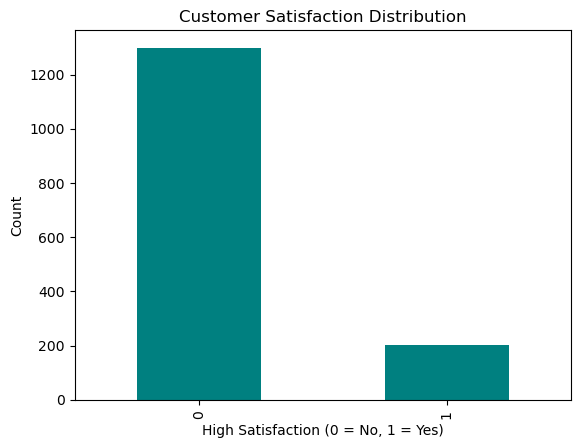

In [6]:
#target varualble distribution
plt.figure()
data['HighSatisfaction'].value_counts().plot(kind='bar',color="teal")
plt.xlabel("High Satisfaction (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Customer Satisfaction Distribution")
plt.show()

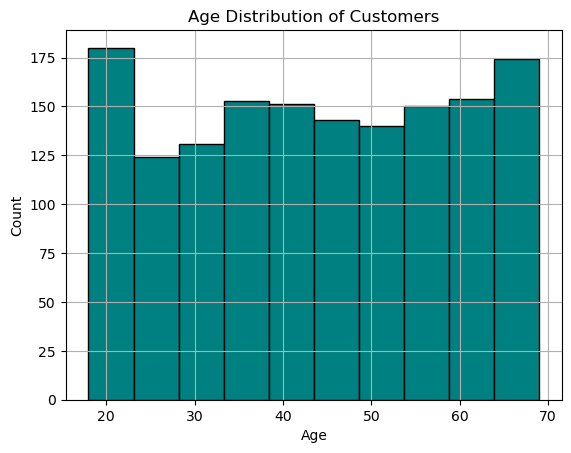

In [7]:
plt.figure()
data['Age'].hist(color="teal",edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Customers")
plt.show()

<Figure size 640x480 with 0 Axes>

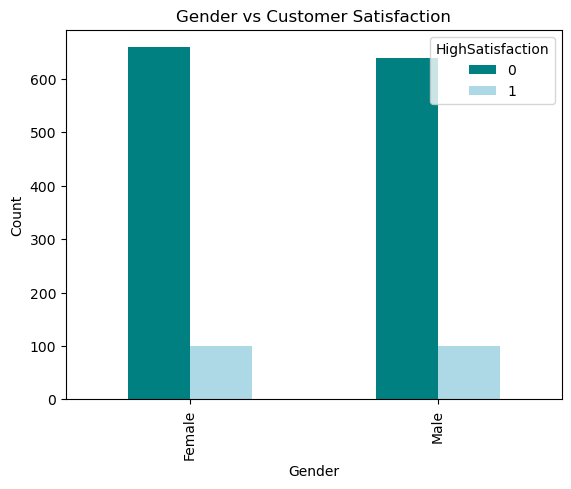

In [8]:
plt.figure()
pd.crosstab(data['Gender'], data['HighSatisfaction']).plot(kind='bar',color=["teal","lightblue"])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender vs Customer Satisfaction")
plt.show()
#male=1
#female=0

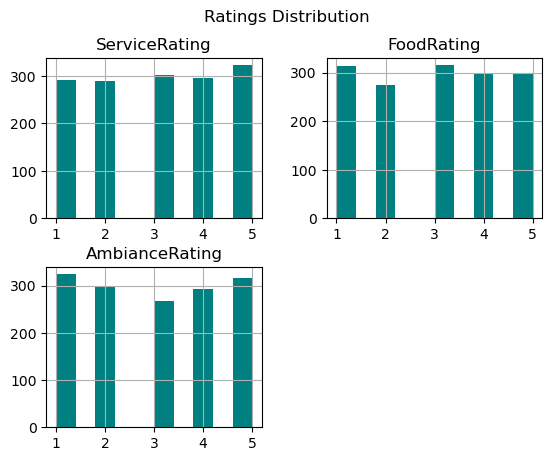

In [9]:
data[['ServiceRating', 'FoodRating', 'AmbianceRating']].hist(color="teal")
plt.suptitle("Ratings Distribution")
plt.show()

In [10]:
data = pd.DataFrame(data, columns=column_names)


NameError: name 'column_names' is not defined

# 3.Data Cleaning And Encoding

In [10]:
data.fillna(method='ffill', inplace=True)

In [11]:
data.drop('CustomerID', axis=1, inplace=True)

In [12]:
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()

In [13]:
data["Gender"]=le1.fit_transform(data["Gender"])
data["VisitFrequency"]=le2.fit_transform(data["VisitFrequency"])
data["PreferredCuisine"]=le3.fit_transform(data["PreferredCuisine"])
data["TimeOfVisit"]=le4.fit_transform(data["TimeOfVisit"])
data["DiningOccasion"]=le5.fit_transform(data["DiningOccasion"])
data["MealType"]=le6.fit_transform(data["MealType"])

In [14]:
data

,Age,Gender,Income,VisitFrequency,AverageSpend,PreferredCuisine,TimeOfVisit,GroupSize,DiningOccasion,MealType,OnlineReservation,DeliveryOrder,LoyaltyProgramMember,WaitTime,ServiceRating,FoodRating,AmbianceRating,HighSatisfaction
0,35,1,83380,3,27.829142,1,0,3,0,1,0,1,1,43.523929,2,5,4,0
1,19,1,43623,2,115.408622,0,1,1,1,0,0,0,0,57.524294,5,5,3,0
2,41,0,83737,3,106.693771,0,1,6,2,0,0,1,0,48.682623,3,4,5,0
3,43,1,96768,2,43.508508,2,2,1,2,0,0,0,0,7.552993,4,5,1,0
4,55,0,67937,1,148.084627,1,0,1,0,1,0,0,1,37.789041,2,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,39,1,114857,1,163.015254,0,2,2,0,0,0,1,1,7.206275,1,2,1,0
1496,37,0,133506,3,190.991911,3,2,4,1,1,0,0,0,37.863952,5,2,2,0
1497,46,1,119159,1,150.088604,0,2,4,1,0,0,1,0,3.925785,3,3,3,1
1498,24,1,27970,3,196.363626,3,1,6,1,0,1,1,0,24.228038,2,2,4,1


# 4.Data Modelling and Evaluation

In [15]:
x=data.drop(["HighSatisfaction"],axis=1)
y=data["HighSatisfaction"]

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [17]:
X_columns = x.columns.tolist()
X_columns

['Age',
 'Gender',
 'Income',
 'VisitFrequency',
 'AverageSpend',
 'PreferredCuisine',
 'TimeOfVisit',
 'GroupSize',
 'DiningOccasion',
 'MealType',
 'OnlineReservation',
 'DeliveryOrder',
 'LoyaltyProgramMember',
 'WaitTime',
 'ServiceRating',
 'FoodRating',
 'AmbianceRating']

In [18]:
x.columns.tolist()

['Age',
 'Gender',
 'Income',
 'VisitFrequency',
 'AverageSpend',
 'PreferredCuisine',
 'TimeOfVisit',
 'GroupSize',
 'DiningOccasion',
 'MealType',
 'OnlineReservation',
 'DeliveryOrder',
 'LoyaltyProgramMember',
 'WaitTime',
 'ServiceRating',
 'FoodRating',
 'AmbianceRating']

In [19]:
log=LogisticRegression()
log.fit(x_train,y_train)
print("data_score:",log.score(x_train,y_train))
print("data_score:",log.score(x_test,y_test))

data_score: 0.8666666666666667
data_score: 0.8633333333333333


In [20]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
print("data_score:",dtc.score(x_train,y_train))
print("data_score:",dtc.score(x_train,y_train))

data_score: 1.0
data_score: 1.0


In [21]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("train_score:",knn.score(x_train,y_train))
print("train_score:",knn.score(x_test,y_test))

train_score: 0.8691666666666666
train_score: 0.85


  File "C:\Users\clare\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\clare\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\clare\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\clare\anaconda3\Lib\subprocess.

In [22]:
rc=RandomForestClassifier()
rc.fit(x_train,y_train)
print("data_score:",rc.score(x_train,y_train))
print("data_score:",rc.score(x_test,y_test))

data_score: 1.0
data_score: 0.8733333333333333


In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [24]:
models={
    "logistic regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()}
best_score=0
best_model=None
for name,model in models.items():
    scores=cross_val_score(model,x,y,cv=5)   #5-fold cross validation
    print(f"{name}Average Accuracy:{scores.mean():.4f}")
    if scores.mean()>best_score:
        best_score=scores.mean()
        best_model=name
print(f"\n Best Model:{best_model} with Accuracy:{best_score:.4f}")

logistic regressionAverage Accuracy:0.8640
KNNAverage Accuracy:0.8480
Decision TreeAverage Accuracy:0.8013
Random ForestAverage Accuracy:0.8773

 Best Model:Random Forest with Accuracy:0.8773


HYPERPARAMETER TUNING

In [25]:
from sklearn.model_selection import GridSearchCV

In [26]:
gscv=GridSearchCV(rc,{'n_estimators': [20,30,50,100],
            'criterion': ['gini','entropy']}
            ,return_train_score=True)

In [27]:
gscv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [20, 30, 50, 100]},
             return_train_score=True)

In [28]:
gscv.best_params_

{'criterion': 'gini', 'n_estimators': 30}

In [29]:
gscv.best_score_

np.float64(0.8825000000000001)

# 5.Saving Model

In [30]:
import pickle

# Save trained model
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(rc, f)

# Save feature names
with open("model_features.pkl", "wb") as f:
    pickle.dump(x.columns.tolist(), f)

print("Model and feature names saved successfully")


Model and feature names saved successfully


In [31]:
#import pickle

In [32]:
#with open("random_forest_model.pkl","wb")as file:
#    pickle.dump(rc,file)

#print("Random forest model saved successfully")

In [33]:
#with open("model_features.pkl", "wb") as f:
 #   pickle.dump(X_columns, f)

In [34]:
#with open("random_forest_model.pkl","rb")as file:
#    loaded_model=pickle.load(file)

# Completed !